# AI for estimating song's popularity

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("modified_data.csv")
data = data.sample(frac=0.2)

In [3]:
data.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_id,artists_id
count,22800.000000,22800.000000,2.280000e+04,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000,2.280000e+04
mean,57080.413114,33.105263,2.279625e+05,0.566023,0.641946,5.335088,-8.241254,0.633553,0.084822,0.315771,0.153864,0.214184,0.472489,122.323905,3.907281,56.583114,4.996633e+07
std,33019.796243,22.402764,1.084501e+05,0.172989,0.251022,3.570313,4.979175,0.481844,0.105748,0.333138,0.306730,0.192387,0.258311,29.917650,0.427055,33.019081,2.871457e+07
min,4.000000,0.000000,1.782600e+04,0.000000,0.000000,0.000000,-43.714000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.403800e+04
25%,28360.000000,17.000000,1.738930e+05,0.455000,0.472000,2.000000,-9.985250,0.000000,0.035800,0.016400,0.000000,0.098100,0.257000,99.004000,4.000000,28.000000,2.519808e+07
50%,57057.500000,34.000000,2.124330e+05,0.579000,0.684000,5.000000,-6.980000,1.000000,0.049100,0.169500,0.000043,0.132000,0.463000,122.134500,4.000000,57.000000,4.928851e+07
75%,85881.000000,50.000000,2.606675e+05,0.694000,0.854000,9.000000,-5.024000,1.000000,0.084700,0.601000,0.049725,0.272000,0.679000,140.411500,4.000000,85.000000,7.560523e+07
max,113997.000000,97.000000,4.789026e+06,0.985000,1.000000,11.000000,1.864000,1.000000,0.962000,0.996000,0.999000,1.000000,0.988000,220.084000,5.000000,113.000000,9.999973e+07


In [4]:
columns = ['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
           'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'genre_id',
           'time_signature', 'artists_id']

layerThiccness = len(columns) * 2

# Podział danych na zbiór treningowy i testowy
train_data, test_data, train_labels, test_labels = train_test_split(
    data[columns], data['popularity'], test_size=0.2)

train_data = tf.convert_to_tensor(train_data, dtype=tf.float32)
test_data = tf.convert_to_tensor(test_data, dtype=tf.float32)
train_labels = tf.convert_to_tensor(train_labels, dtype=tf.float32)
test_labels = tf.convert_to_tensor(test_labels, dtype=tf.float32)

In [5]:
# Normalization

mean = train_data.numpy().mean(axis=0)
std = train_data.numpy().std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(layerThiccness + 1, activation='relu', input_shape=[len(columns)]),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness / 2, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics=['mae', 'mse'])

In [7]:

history = model.fit(train_data, train_labels, epochs=10, validation_split=0.2, verbose=0)

In [8]:
test_results = model.evaluate(test_data, test_labels, verbose=0)
test_mae = test_results[1]

train_results = model.evaluate(train_data, train_labels, verbose=0)
train_mae = train_results[1]

Mean Absolute Error (Test): 17.700735092163086
Mean Absolute Error (Train): 17.79060173034668


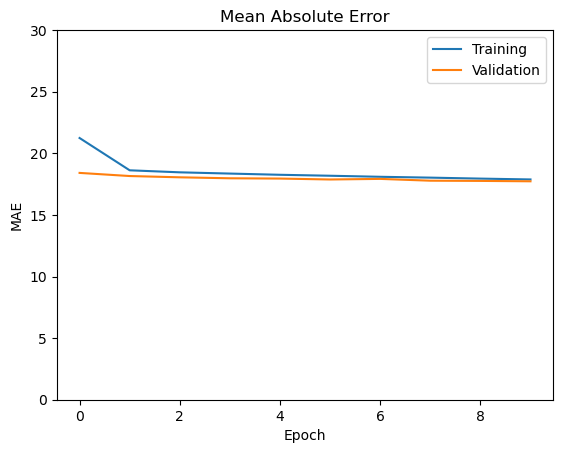

In [9]:
# Wykres
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.ylim(top=30)
plt.ylim(bottom=0)
print("Mean Absolute Error (Test):", test_mae)
print("Mean Absolute Error (Train):", train_mae)
plt.show()